In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
import warnings

### Loading the data

In [4]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dataset is the mixture of both categorical and numerical variables. 

### Adding the response variable

In [7]:
df['response'] = (df.y == 'yes').astype('int')

In [8]:
#count the number of rows for each type
df.groupby('response').size()

response
0    36548
1     4640
dtype: int64

There is 11% of sample belongs to the minority class. In other words, In past when customers were offfered this product 11% of them accepted it. Dataset is imbalanced but not as heavy as we usually see in our line of work. 

### Distribution of variables

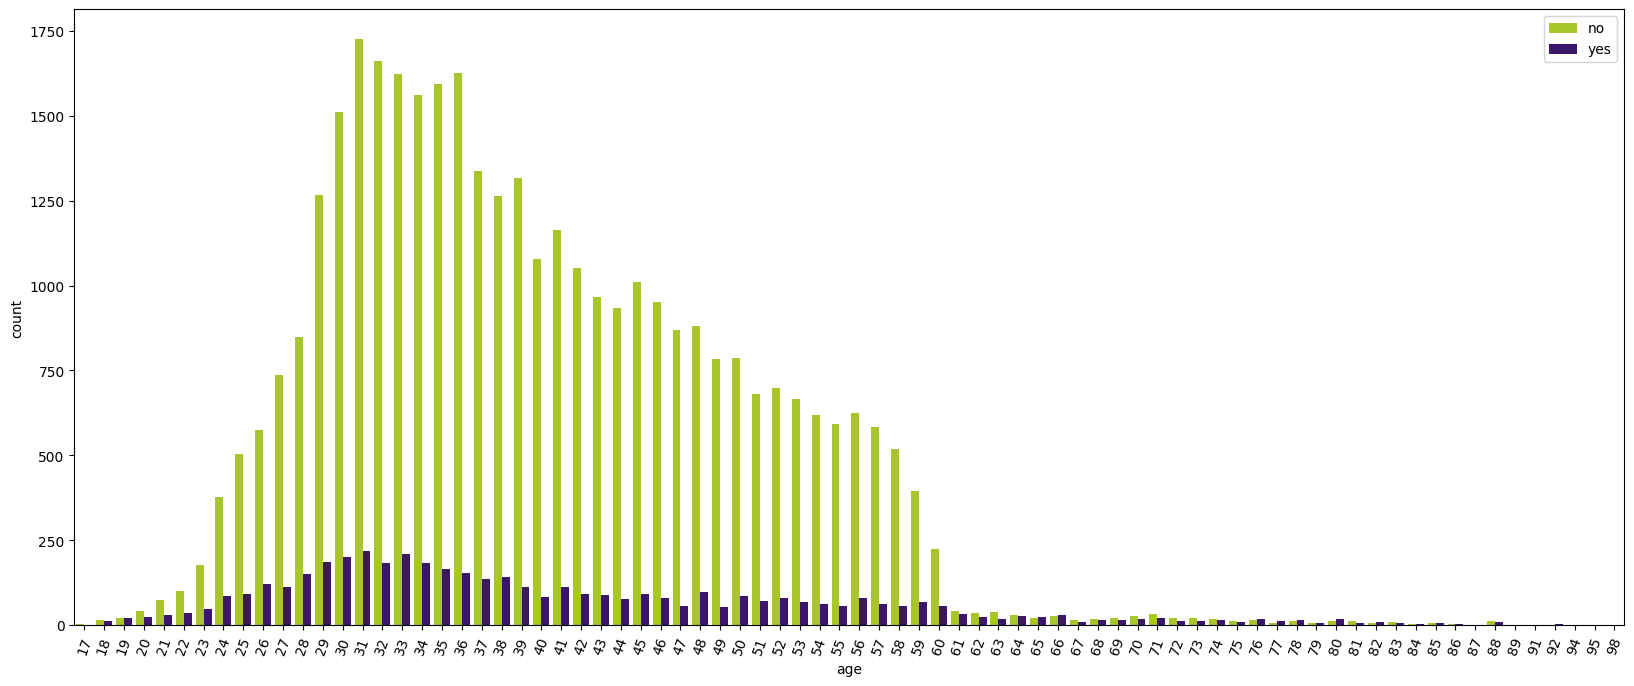

In [67]:
plt.figure(figsize=(20,8))
g = sns.countplot(x = 'age', data =  df, hue='y', palette=['#b8df10',"#390879"])
g.tick_params(axis='x', rotation=70)
g.legend_.set_title(None)
plt.show()

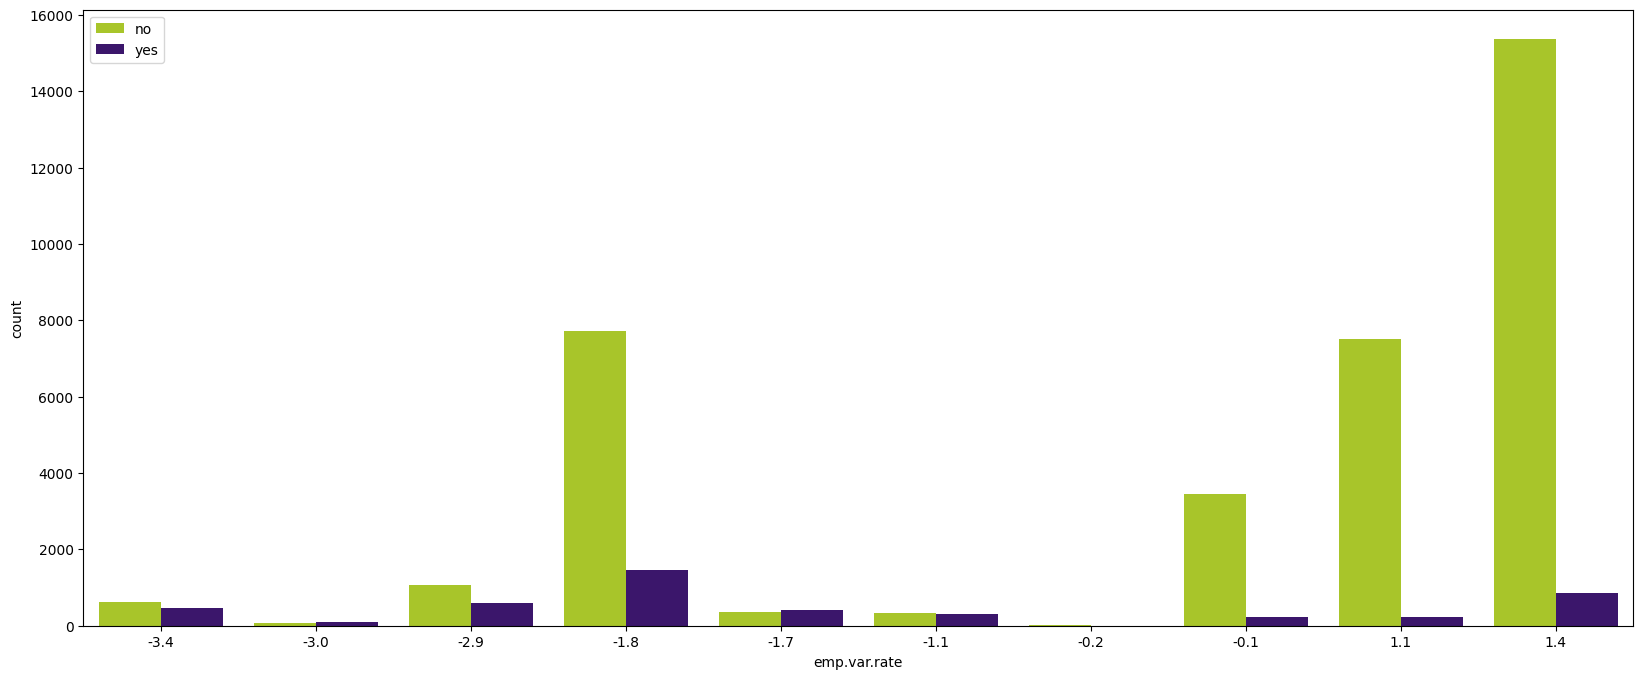

In [68]:
plt.figure(figsize=(20,8))
g = sns.countplot(x = 'emp.var.rate', data =  df, hue='y', palette=['#b8df10',"#390879"])
g.legend_.set_title(None)
plt.show()

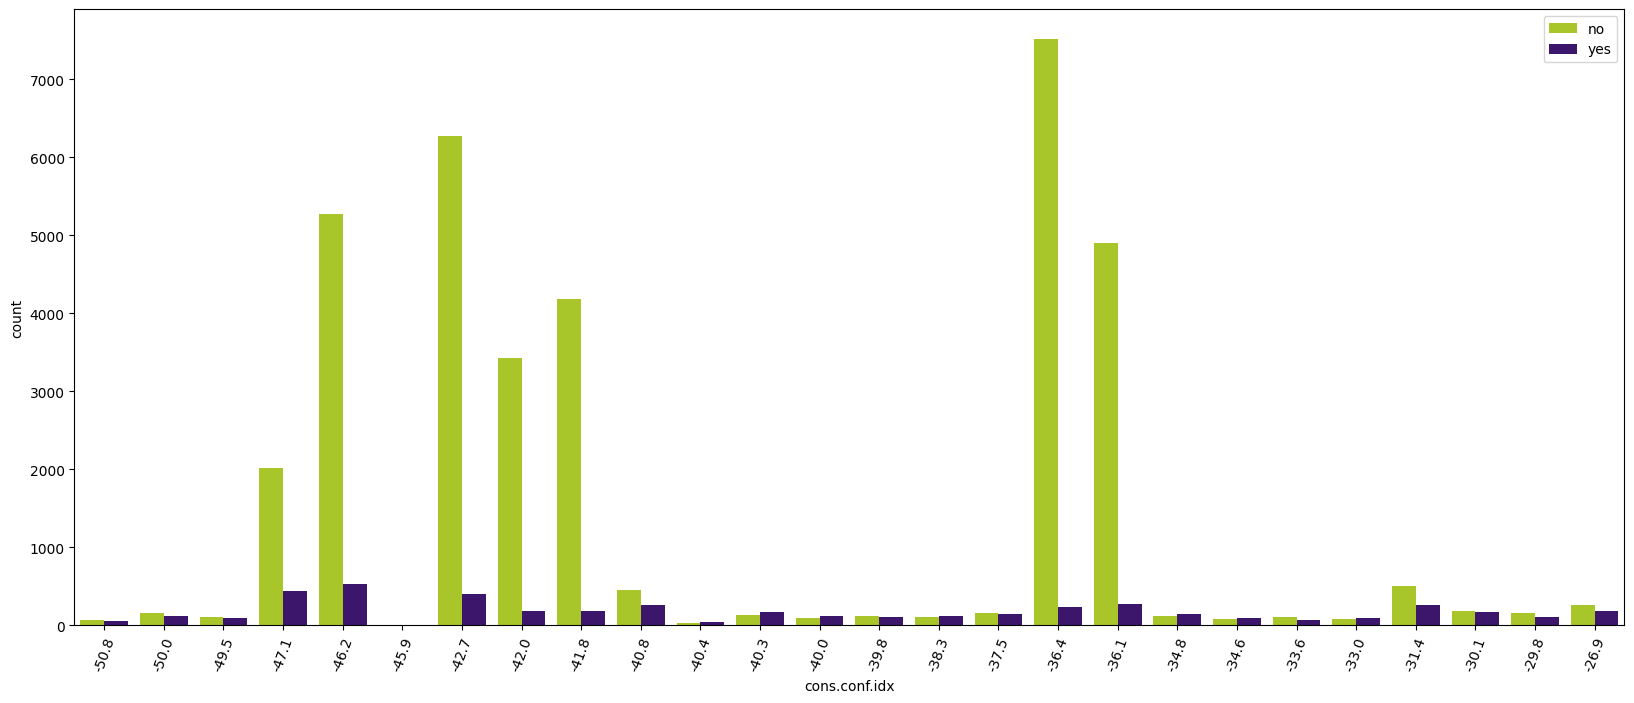

In [69]:
plt.figure(figsize=(20,8))
g = sns.countplot(x = 'cons.conf.idx', data =  df, hue='y', palette=['#b8df10',"#390879"])
g.tick_params(axis='x', rotation=70)
g.legend_.set_title(None)
plt.show()

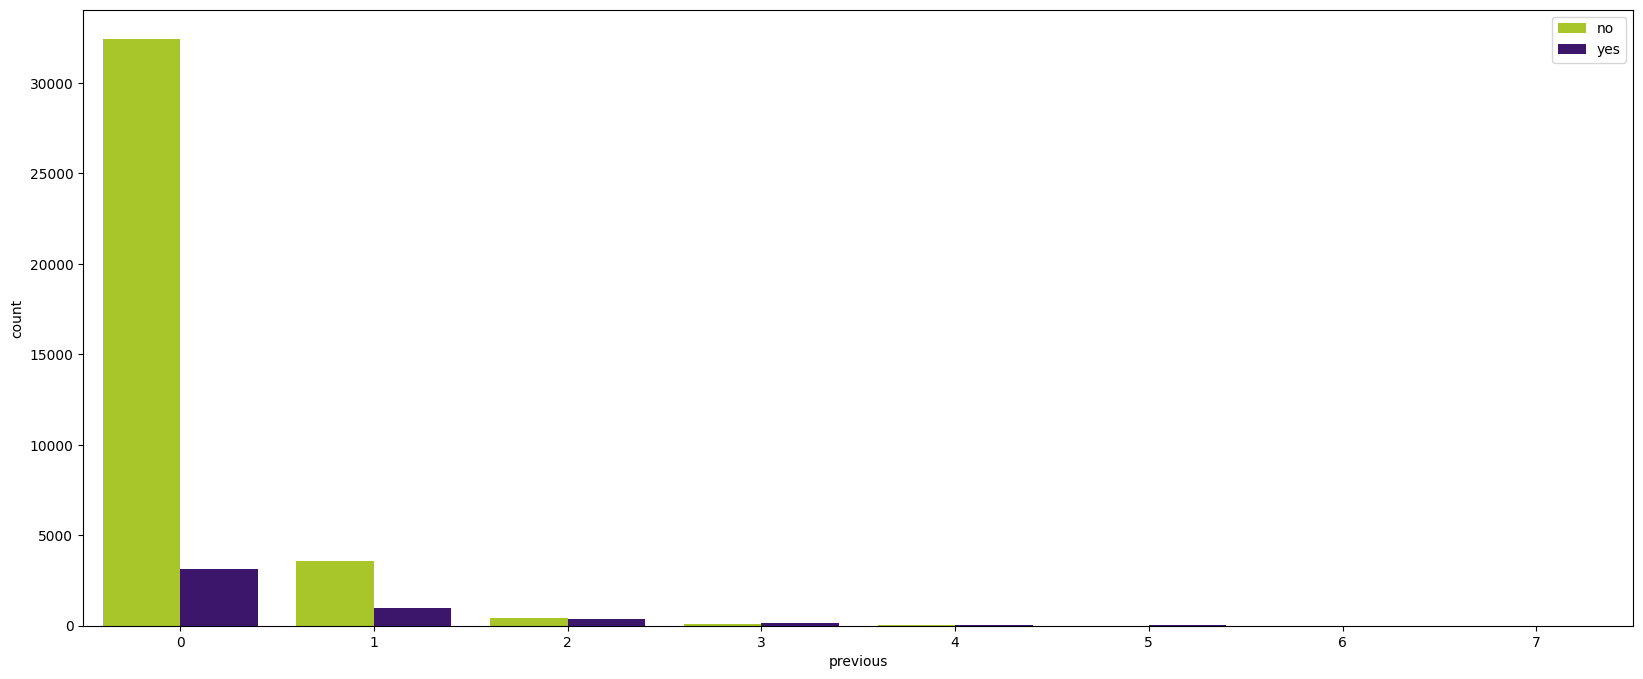

In [70]:
plt.figure(figsize=(20,8))
g = sns.countplot(x = 'previous', data =  df, hue='y', palette=['#b8df10',"#390879"])
g.legend_.set_title(None)
plt.show()

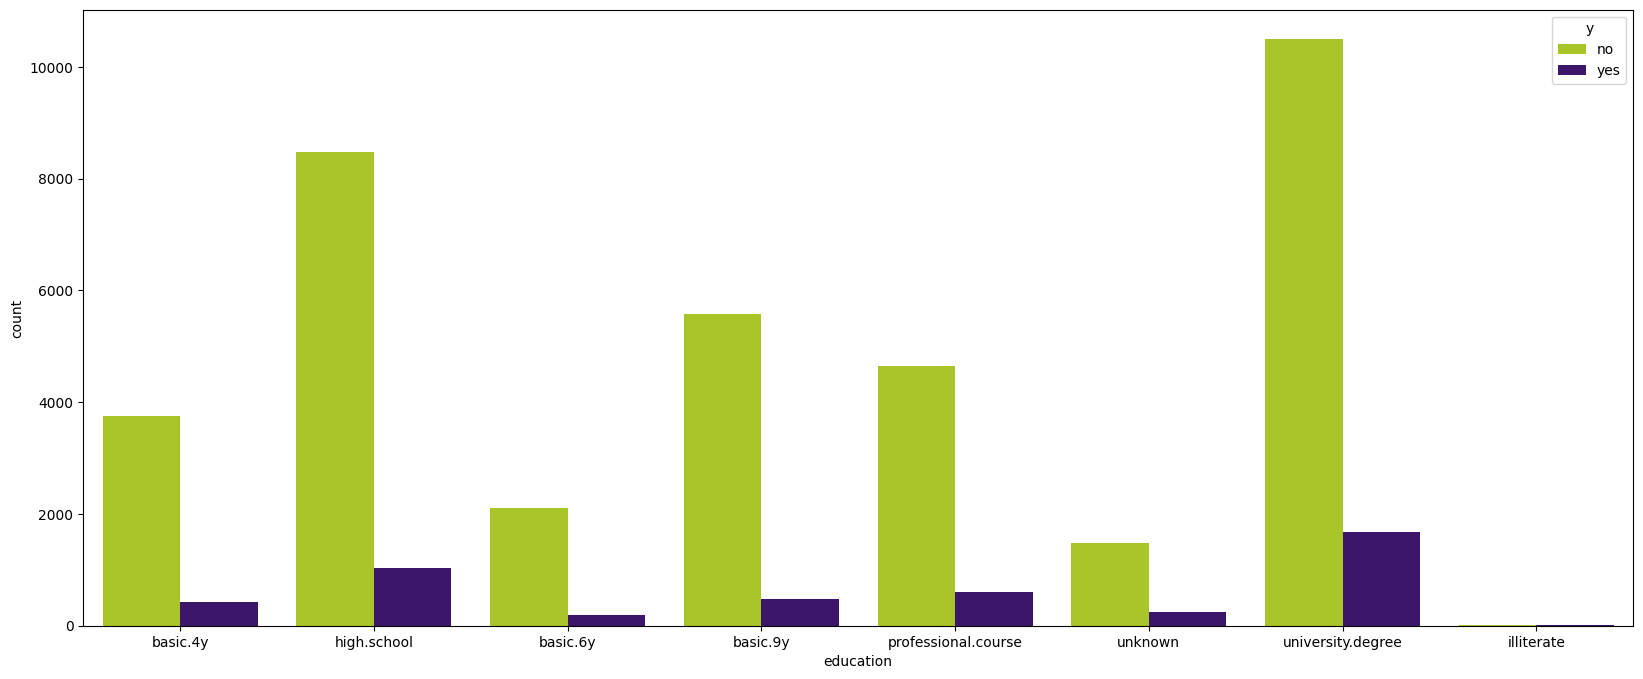

In [41]:
plt.figure(figsize=(20,8))
g = sns.countplot(x = 'education', data =  df, hue='y', palette=['#b8df10',"#390879"])
plt.show()

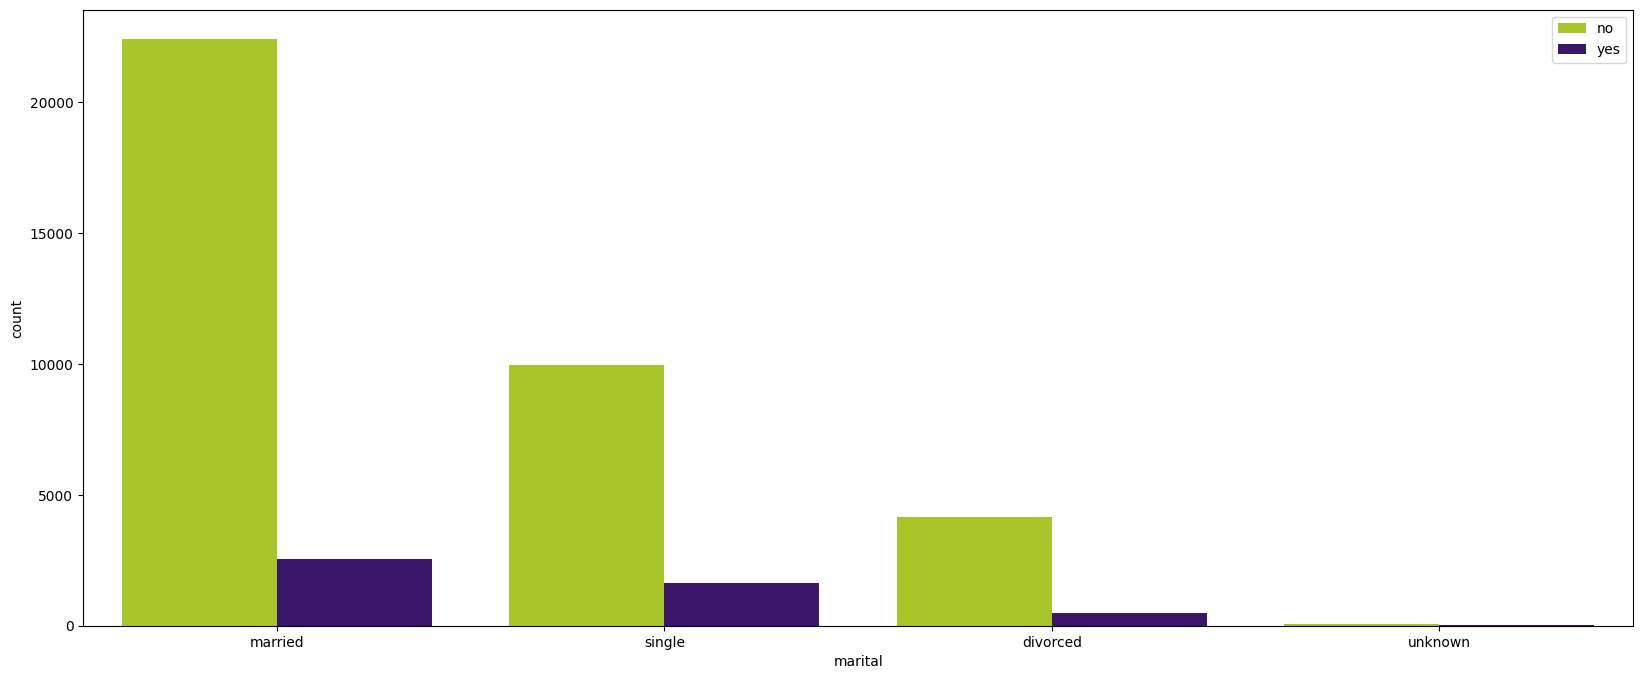

In [71]:
plt.figure(figsize=(20,8))
g = sns.countplot(x = 'marital', data =  df, hue='y', palette=['#b8df10',"#390879"])
g.legend_.set_title(None)
plt.show()

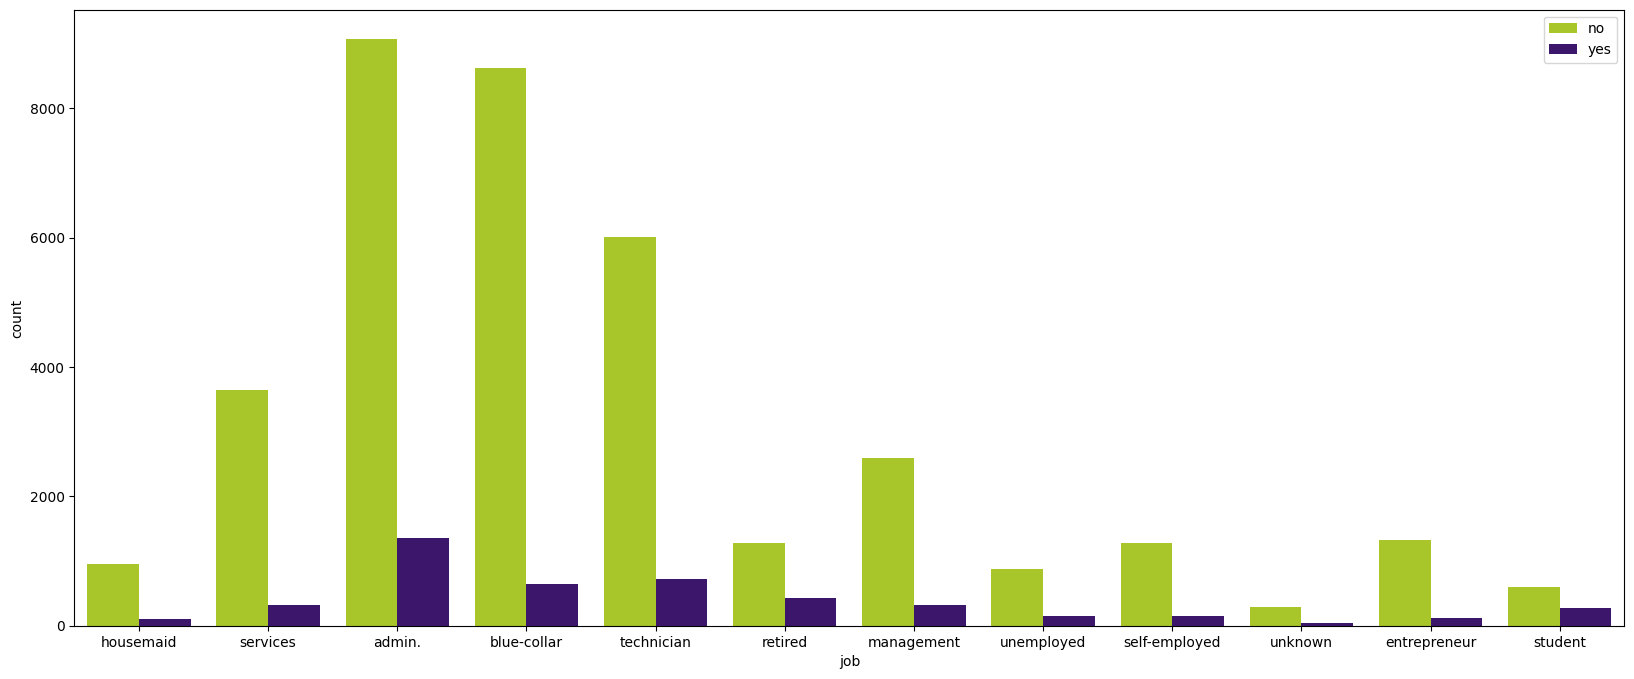

In [72]:
plt.figure(figsize=(20,8))
g = sns.countplot(x = 'job', data =  df, hue='y', palette=['#b8df10',"#390879"])
g.legend_.set_title(None)
plt.show()

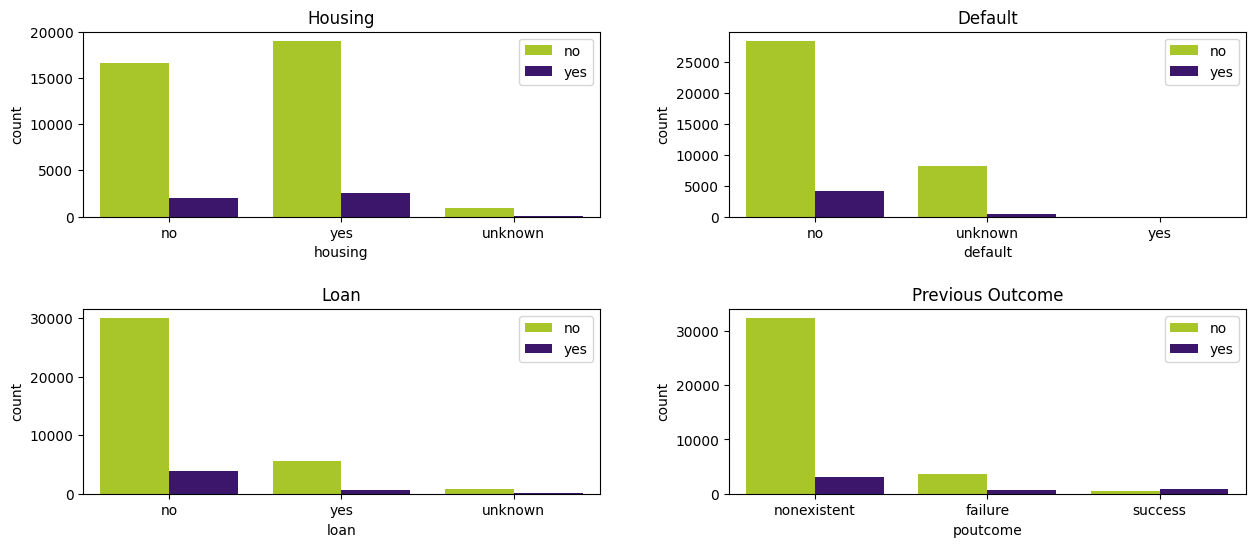

In [79]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15,6))
sns.countplot(x = 'housing', data =  df, hue='y', palette=['#b8df10',"#390879"], ax=ax[0,0])
ax[0,0].set_title('Housing')
ax[0,0].legend_.set_title(None)
sns.countplot(x = 'default', data =  df, hue='y', palette=['#b8df10',"#390879"], ax=ax[0,1])
ax[0,1].set_title('Default')
ax[0,1].legend_.set_title(None)
sns.countplot(x = 'loan', data =  df, hue='y', palette=['#b8df10',"#390879"], ax =ax[1,0])
ax[1,0].set_title('Loan')
ax[1,0].legend_.set_title(None)
sns.countplot(x = 'poutcome', data =  df, hue='y', palette=['#b8df10',"#390879"], ax=ax[1,1])
ax[1,1].set_title('Previous Outcome')
ax[1,1].legend_.set_title(None)
plt.subplots_adjust(wspace=0.25, hspace=0.5)

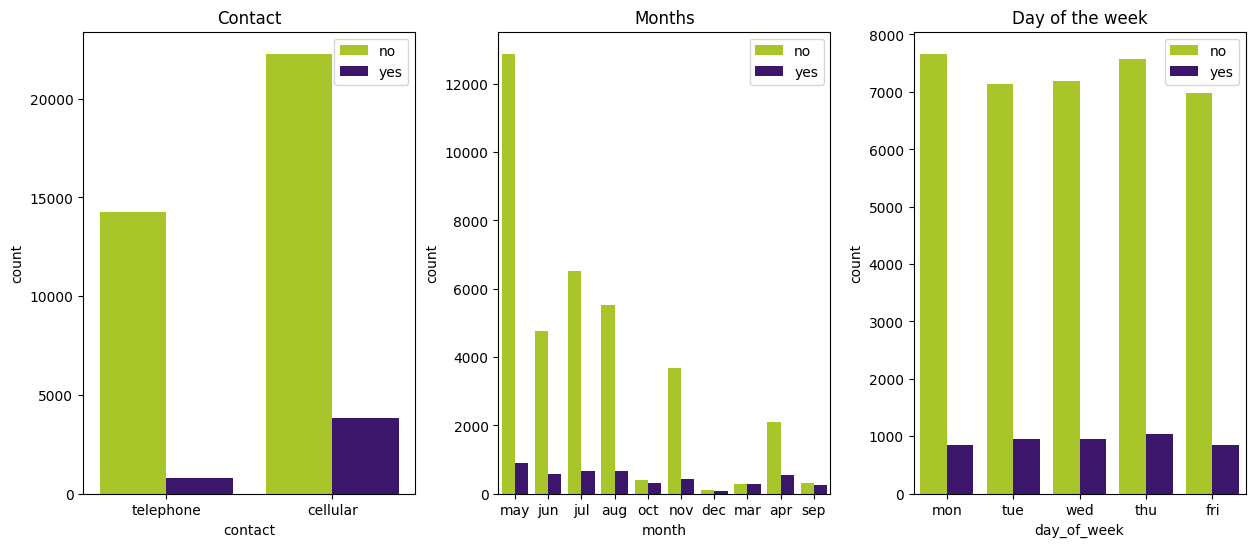

In [78]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,6))
sns.countplot(x = 'contact', data =  df, hue='y', palette=['#b8df10',"#390879"], ax=ax[0])
ax[0].set_title('Contact')
ax[0].legend_.set_title(None)
sns.countplot(x = 'month', data =  df, hue='y', palette=['#b8df10',"#390879"], ax=ax[1])
ax[1].set_title('Months')
ax[1].legend_.set_title(None)
sns.countplot(x = 'day_of_week', data =  df, hue='y', palette=['#b8df10',"#390879"], ax =ax[2])
ax[2].set_title('Day of the week')
ax[2].legend_.set_title(None)
plt.subplots_adjust(wspace=0.25, hspace=0.5)